# Tugas Praktikum 2
## M Naufal Irham Ramdhani (10818019)

### Soal 1
Lakukan regresi liniear seperti yang ditunjukan pada praktikum DL2

Import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
import random

Upload data terlebih dahulu ke google colab

In [3]:
uploaded = files.upload()

Saving Used Cars.csv to Used Cars.csv


Input data

In [4]:
df = pd.read_csv('Used Cars.csv')
n_df = np.shape(df)[0]
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


Data preparation

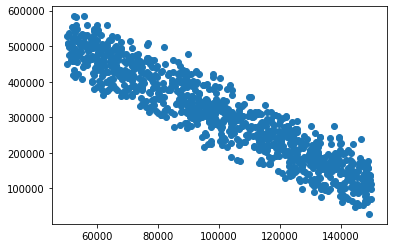

In [5]:
feature = ['km','current price']

plt.scatter(df[feature[0]], df[feature[1]])
plt.show()

Data yang digunakan untuk training sebesar 80% dari data keseluruhan (dapat diubah)

In [6]:
persen_data = 0.8
x_train = df[feature[0]][:int(n_df*persen_data)]
y_train = df[feature[1]][:int(n_df*persen_data)]

x_test  = df[feature[0]][int(n_df*persen_data):]
y_test  = df[feature[1]][int(n_df*persen_data):]

Regresi yang akan digunakan adalah regresi liniear dengan model sebagai berikut

$$y = b + w_1x_1 + w_2x_2 + ...$$

Banyaknya suku tergantung berapa banyak feature yang digunakan

In [7]:
class regression(object):
    def __init__(self, x, y, learning_rate = 1):
      self.regressor      = np.array([x]).T
      self.response       = np.array([y]).T
      self.alpha          = learning_rate
      self.size_regressor = np.shape(self.regressor)[0]
      self.n_feature      = np.shape(self.regressor)[1]
      random.seed(20201212)
      self.w              = np.random.randn(self.n_feature,1)
      self.b              = np.random.randn(1)
      self.mean_regressor = np.mean(self.regressor)
      self.std_regressor  = np.std(self.regressor)
      self.mean_response  = np.mean(self.response)
      self.std_response   = np.std(self.response)
      
    def normalize(self):
      self.regressor = (self.regressor - self.mean_regressor)/self.std_regressor
      self.response  = (self.response - self.mean_response)/self.std_response
    
    def forward(self, x, y, w, b):
      self.y_hat = x@w+b
      self.error = y-self.y_hat
      self.MSE   = (self.error.T@self.error)/self.size_regressor
      
    def backward(self):
      dz      = -2*self.error/self.size_regressor
      self.dw = self.regressor.T@dz
      self.db = np.sum(dz)
    
    def update(self):
      self.w = self.w - self.alpha*self.dw
      self.b = self.b - self.alpha*self.db
    
    def train(self, epochs = 10000):
      self.normalize()
      for i in range(1,epochs+1):
        self.forward(self.regressor, self.response, self.w, self.b)
        self.backward()
        self.update()
        if i%(epochs/5) == 0:
          print('Pada epoch ke-', i, 'MSE =', self.MSE)
      return self.y_hat*self.std_response+self.mean_response

class test_regression(regression):
    def __init__(self, x, y, w, b):
      super().__init__(x, y)
      super().normalize()
      super().forward(self.regressor, self.response, w, b)
      print('MSE =', self.MSE)
      self.y_hat = self.y_hat*self.std_response+self.mean_response


### Hasil Training

Pada epoch ke- 8 MSE = [[0.12140568]]
Pada epoch ke- 16 MSE = [[0.12140568]]
Pada epoch ke- 24 MSE = [[0.12140568]]
Pada epoch ke- 32 MSE = [[0.12140568]]
Pada epoch ke- 40 MSE = [[0.12140568]]


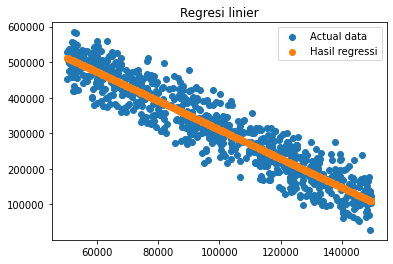

In [8]:
coba = regression(x_train, y_train, 0.4)

hasil = coba.train(epochs = 40) #MSE sudah tidak banyak berubah

plt.scatter(x_train, y_train, label = 'Actual data')
plt.scatter(x_train, hasil, label = 'Hasil regressi')
plt.title("Regresi linier")
plt.legend()
plt.show()

### Hasil Testing

MSE = [[0.13780832]]


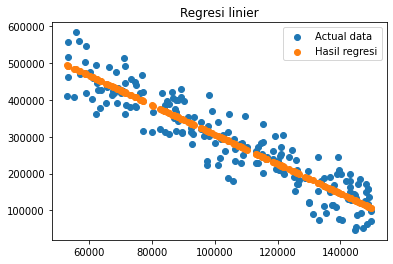

In [9]:
testing = test_regression(x_test, y_test , coba.w, coba.b)

plt.scatter(x_test, y_test, label = 'Actual data')
plt.scatter(x_test, testing.y_hat, label = 'Hasil regresi')
plt.title("Regresi linier")
plt.legend()
plt.show()

### Soal 2
Melakukan regresi dengan model yang sudah di coding di soal 1

###a) Menyiapkan data untuk training

In [10]:
dataset_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
# features = ['total_rooms', 'total_bedrooms', 'population', 'housing_median_age', 'median_house_value']
features = ['median_income', 'median_house_value']
dataset_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [12]:
dataset_train.describe()

,median_income,median_house_value
count,17000.000000,17000.000000
mean,3.883578,207300.912353
std,1.908157,115983.764387
min,0.499900,14999.000000
25%,2.566375,119400.000000
50%,3.544600,180400.000000
75%,4.767000,265000.000000
max,15.000100,500001.000000


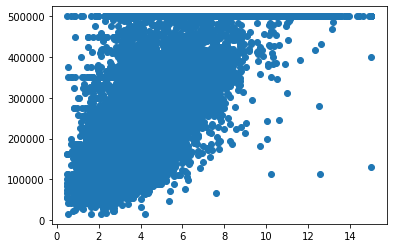

In [11]:
dataset_train = dataset_train[features]

x_train = dataset_train[features[0]]
y_train = dataset_train[features[1]]

plt.scatter(x_train, y_train)
plt.show()

Berdasarkan grafik diatas, terlihat bahwa ada keanehan pada sumbu y, yaitu nilai mentok di nilai maximum. Maka dari itu data dengan nilai maximum dihilangkan

In [13]:
dataset_train = dataset_train[dataset_train['median_house_value'] != max(dataset_train['median_house_value'])]

###Hasil Training

Pada epoch ke- 20 MSE = [[0.58303466]]
Pada epoch ke- 40 MSE = [[0.58303466]]
Pada epoch ke- 60 MSE = [[0.58303466]]
Pada epoch ke- 80 MSE = [[0.58303466]]
Pada epoch ke- 100 MSE = [[0.58303466]]


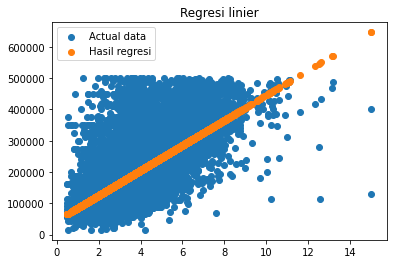

In [14]:
x_train = dataset_train[features[0]]
y_train = dataset_train[features[1]]
soal2 = regression(x_train, y_train, 0.4)

hasil_soal2 = soal2.train(epochs = 100)

plt.scatter(x_train, y_train, label = 'Actual data')
plt.scatter(x_train, hasil_soal2, label = 'Hasil regresi')
plt.title("Regresi linier")
plt.legend()
plt.show()

###b) Menyiapkan data untuk test

In [15]:
dataset_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
dataset_test = dataset_test[features]

In [16]:
dataset_test.describe()

,median_income,median_house_value
count,3000.000000,3000.00000
mean,3.807272,205846.27500
std,1.854512,113119.68747
min,0.499900,22500.00000
25%,2.544000,121200.00000
50%,3.487150,177650.00000
75%,4.656475,263975.00000
max,15.000100,500001.00000


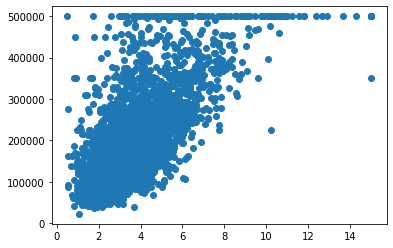

In [17]:
x_test = dataset_test[features[0]]
y_test = dataset_test[features[1]]

plt.scatter(x_test, y_test)
plt.show()

Berdasarkan grafik diatas, terlihat bahwa disini juga ada keanehan pada sumbu y, yaitu nilai mentok di nilai maximum. Maka dari itu data dengan nilai maximum dihilangkan

In [18]:
dataset_test = dataset_test[dataset_test['median_house_value'] != max(dataset_test['median_house_value'])]

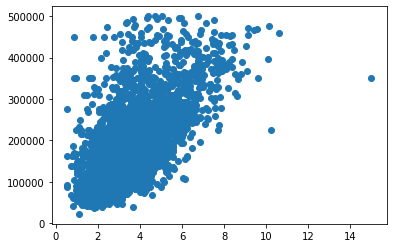

In [21]:
x_test = dataset_test[features[0]]
y_test = dataset_test[features[1]]

plt.scatter(x_test, y_test)
plt.show()

###Hasil test

MSE = [[0.59888771]]


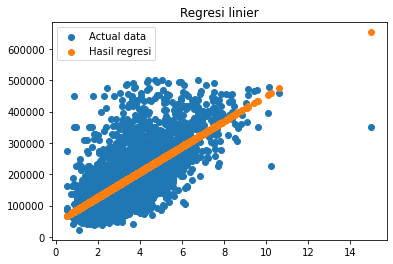

In [22]:
testing_soal2 = test_regression(x_test, y_test , soal2.w, soal2.b)

plt.scatter(x_test, y_test, label = 'Actual data')
plt.scatter(x_test, testing_soal2.y_hat, label = 'Hasil regresi')
plt.title("Regresi linier")
plt.legend()
plt.show()